# 10 분 판다스 
- 이것은 간단한 판다스 소개이다. 새로운 사용자에게 도움을 준다. 
- 당신은 더욱 복잡한 리시피를 Cookbook에서 확인할 수 있다. 
- 관례상 다음을 임포트 하자. 

In [2]:
import numpy as np
import pandas as pd 

## 객체생성 
- Intro to data structs section을 추가로 살펴보라. 
- Series를 값들의 리스트로 전달하여 생성한다. 
- 판다스는 기본적으로 integer 인덱스로 생성한다. 

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- DataFrame 을 Numpy 배열을 전달하여 생성한다. 
- datetime 인덱스와 레이블된 칼럼을 전달하자.  

In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.913604,0.786390,-0.571465,0.194675
2013-01-02,0.128655,-0.650144,0.078325,-0.663659
2013-01-03,0.928224,-0.087307,0.448153,0.298189
2013-01-04,-0.515765,-1.524854,1.333667,-0.869151
2013-01-05,-0.947384,0.956201,0.213975,-0.789382
2013-01-06,0.020625,-0.429744,-0.613074,-0.192551


- 객체의 딕셔너리를 전달하여 Dateframe를 생성한다. 
- 이는 series와 같은 구조를 만들어 낸다. 

In [8]:
df2 = pd.DataFrame( 
  {
    "A": 1.0,
    "B": pd.Timestamp("20130102"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo"
  }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


- 위 DataFrame에 대해서 dtype를 확인하면 다른 데이터 타입들의 모임임을 알 수 있다. 

In [9]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

- 만약 IPython 을 이용한다면 tab 자동완성을 이용할 수 있다. 
- 여기에서는 완료된 속성들의 서브셋을 확인할 수 있다. 

## Viewing data
- 다음과 같이 탑과 바텀 로를 확인할 수 있다. 

In [11]:
df.head()

,A,B,C,D
2013-01-01,0.913604,0.786390,-0.571465,0.194675
2013-01-02,0.128655,-0.650144,0.078325,-0.663659
2013-01-03,0.928224,-0.087307,0.448153,0.298189
2013-01-04,-0.515765,-1.524854,1.333667,-0.869151
2013-01-05,-0.947384,0.956201,0.213975,-0.789382


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.515765,-1.524854,1.333667,-0.869151
2013-01-05,-0.947384,0.956201,0.213975,-0.789382
2013-01-06,0.020625,-0.429744,-0.613074,-0.192551


- 인덱스, 칼럼들을 확인할 수 있다. 

In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

- DataFrame.to_numpy() 는 이후 데이터의 Numpy로 표현할 수 있도록 한다. 
- 이는 DataFrame 이 서로다른 칼럼을 가지고 있다면 매우 비싼 처리이다. 
- 이는 pandas와 Numpy 사이의 근본적인 차이점 때문이다. 
- NumPy 배열들은 전체 배열이 하나의 데이터 타입만 가질 수 있다. 
- 반면 Pandas DataFrames 는 각 칼럼의 dtype 를 가지고 있다. 
- DataFrame.to_numpy() 를 호출할때, pandas는 NumPy dtype 을 찾을 것이고, DataFrame에서 dtypes의 전체를 가지고 있다. 
- 이는 결국 모든 값을 파이썬 객체로 캐스팅해야 하는 객체가 될 수 있다. 

- df에 대해서 DataFrame 이 모두 floating-point 값을 가진다면 DataFrame.to_numpy() 는 빠르게 수행된다. 그리고 데이터를 복제하지 않는다. 

In [15]:
df.to_numpy()

array([[ 0.91360443,  0.78638988, -0.5714647 ,  0.19467519],
       [ 0.12865456, -0.65014418,  0.07832478, -0.66365915],
       [ 0.92822413, -0.08730701,  0.44815284,  0.2981895 ],
       [-0.51576497, -1.52485406,  1.3336671 , -0.86915054],
       [-0.94738414,  0.9562012 ,  0.21397523, -0.78938179],
       [ 0.02062451, -0.42974406, -0.61307354, -0.19255125]])

- df2에 대해서 DataFrame 는 멀티 데이터 타입을 가진다. DataFrame.to_numpy()는 비싼 처리이다. DataFrame

In [16]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

- Note: DataFrame.to_numpy() 는 출력결과에서 인덱스 혹은 칼럼 레이블이 포함되지 않는다. 
- describe() 는 데이터에 대해서 빠른 통계적 써머리를 보여준다. 

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.087993,-0.158243,0.148264,-0.336980
std,0.752375,0.929802,0.721383,0.510206
min,-0.947384,-1.524854,-0.613074,-0.869151
25%,-0.381668,-0.595044,-0.409017,-0.757951
50%,0.074640,-0.258526,0.146150,-0.428105
75%,0.717367,0.567966,0.389608,0.097869
max,0.928224,0.956201,1.333667,0.298189


- 데이터를 변경해보자. 

In [18]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.913604,0.128655,0.928224,-0.515765,-0.947384,0.020625
B,0.786390,-0.650144,-0.087307,-1.524854,0.956201,-0.429744
C,-0.571465,0.078325,0.448153,1.333667,0.213975,-0.613074
D,0.194675,-0.663659,0.298189,-0.869151,-0.789382,-0.192551


- 축에 대해서 소팅은 다음과 같이 수행한다. 

In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.194675,-0.571465,0.786390,0.913604
2013-01-02,-0.663659,0.078325,-0.650144,0.128655
2013-01-03,0.298189,0.448153,-0.087307,0.928224
2013-01-04,-0.869151,1.333667,-1.524854,-0.515765
2013-01-05,-0.789382,0.213975,0.956201,-0.947384
2013-01-06,-0.192551,-0.613074,-0.429744,0.020625


- 값에 따라 소팅을 하자. 

In [20]:
df.sort_values(by="B")

,A,B,C,D
2013-01-04,-0.515765,-1.524854,1.333667,-0.869151
2013-01-02,0.128655,-0.650144,0.078325,-0.663659
2013-01-06,0.020625,-0.429744,-0.613074,-0.192551
2013-01-03,0.928224,-0.087307,0.448153,0.298189
2013-01-01,0.913604,0.786390,-0.571465,0.194675
2013-01-05,-0.947384,0.956201,0.213975,-0.789382


## Selection

- Note: selecting과 setting 을 위한 표준 Python / Numpy 표현식들은 직관적이고, 대화식 작업에 유용하지만 프로덕션 코드의 경우 최적화된 pandas 데이터 엑세스 방법인, .at, .iat, .loc 및 .iloc을 권장한다. 
- 인덱싱 문서는 [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing) 과 [MultiIndex / Advanced Inexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced)

### Gettting 

- 단일 칼럼을 선택하는 것은 Series를 반환한다. 이는 df.A 와 동일하다. 

In [21]:
df["A"]

2013-01-01    0.913604
2013-01-02    0.128655
2013-01-03    0.928224
2013-01-04   -0.515765
2013-01-05   -0.947384
2013-01-06    0.020625
Freq: D, Name: A, dtype: float64

In [22]:
df.A

2013-01-01    0.913604
2013-01-02    0.128655
2013-01-03    0.928224
2013-01-04   -0.515765
2013-01-05   -0.947384
2013-01-06    0.020625
Freq: D, Name: A, dtype: float64

- '[', ']' 을 통해서 선택하면 rows 슬리이스를 수행한다. 

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,0.913604,0.786390,-0.571465,0.194675
2013-01-02,0.128655,-0.650144,0.078325,-0.663659
2013-01-03,0.928224,-0.087307,0.448153,0.298189


In [24]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.128655,-0.650144,0.078325,-0.663659
2013-01-03,0.928224,-0.087307,0.448153,0.298189
2013-01-04,-0.515765,-1.524854,1.333667,-0.869151


### Selection by label 

- 레이블을 이용하여 크로스 섹션을 획득할 수 있다. 

In [25]:
df.loc[dates[0]]

A    0.913604
B    0.786390
C   -0.571465
D    0.194675
Name: 2013-01-01 00:00:00, dtype: float64

In [26]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

- 복수 축에서 label을 이용하여 조회가능하다. 

In [27]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.913604,0.786390
2013-01-02,0.128655,-0.650144
2013-01-03,0.928224,-0.087307
2013-01-04,-0.515765,-1.524854
2013-01-05,-0.947384,0.956201
2013-01-06,0.020625,-0.429744


- label 슬라이싱을 보여주며, 양쪽 엔드포인트가 포함된다. 

In [28]:
df.loc["20130102": "20130104", ["A", "B"]]

,A,B
2013-01-02,0.128655,-0.650144
2013-01-03,0.928224,-0.087307
2013-01-04,-0.515765,-1.524854


- 반환된 객체의 차원에서 리덕션 수행 

In [29]:
df.loc["20130102", ["A", "B"]]

A    0.128655
B   -0.650144
Name: 2013-01-02 00:00:00, dtype: float64

- scalar value 를 얻을 수 있다. 

In [30]:
df.loc[dates[0], "A"]

0.9136044307664051

- 스칼라에 빠르게 접근하기 위해서 동일한 처리이지만 at를 이용한다. 

In [31]:
df.at[dates[0], "A"]

0.9136044307664051

### Selection by position

- 정수를 전달해서 포지션을 통해 셀렉트 하자. 

In [32]:
df.iloc[3]

A   -0.515765
B   -1.524854
C    1.333667
D   -0.869151
Name: 2013-01-04 00:00:00, dtype: float64

- 정수 슬라이스를 통해서 Numpy/Python 과 유사하게 동작한다. 

In [33]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.515765,-1.524854
2013-01-05,-0.947384,0.956201


- 정수 포지션 위치의 목록에 의해서 Numpy/Python 스타일로 슬라이싱 할 수 있다. 

In [34]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.128655,0.078325
2013-01-03,0.928224,0.448153
2013-01-05,-0.947384,0.213975


- 명시적으로 row를 슬라이싱 한다. 

In [35]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.128655,-0.650144,0.078325,-0.663659
2013-01-03,0.928224,-0.087307,0.448153,0.298189


- 명시적으로 칼럼을 조회하기 위해서 다음과 같이 수행하자. 

In [37]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.786390,-0.571465
2013-01-02,-0.650144,0.078325
2013-01-03,-0.087307,0.448153
2013-01-04,-1.524854,1.333667
2013-01-05,0.956201,0.213975
2013-01-06,-0.429744,-0.613074


- 명시적으로 값을 조회하기 

In [38]:
df.iloc[1, 1]

-0.6501441767059704

- 스칼라에 접근을 빠르게 하려면 다음과 같이 수행한다. 

In [39]:
df.iat[1, 1]

-0.6501441767059704

### Boolean indexing

- 데이터 셀렉트를 하기 위해서 단일 칼럼의 값을 이용하자. 

In [40]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.913604,0.786390,-0.571465,0.194675
2013-01-02,0.128655,-0.650144,0.078325,-0.663659
2013-01-03,0.928224,-0.087307,0.448153,0.298189
2013-01-06,0.020625,-0.429744,-0.613074,-0.192551


- DataFrame으로 값을 셀렉팅 하기 
- boolean 조건이 만나면 셀렉팅 된다. 

In [41]:
df[df>0]

,A,B,C,D
2013-01-01,0.913604,0.786390,NaN,0.194675
2013-01-02,0.128655,NaN,0.078325,NaN
2013-01-03,0.928224,NaN,0.448153,0.298189
2013-01-04,NaN,NaN,1.333667,NaN
2013-01-05,NaN,0.956201,0.213975,NaN
2013-01-06,0.020625,NaN,NaN,NaN


- isin() 메소드를 이용하여 필터하기 

In [42]:
df2 = df.copy()

In [43]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,0.913604,0.786390,-0.571465,0.194675,one
2013-01-02,0.128655,-0.650144,0.078325,-0.663659,one
2013-01-03,0.928224,-0.087307,0.448153,0.298189,two
2013-01-04,-0.515765,-1.524854,1.333667,-0.869151,three
2013-01-05,-0.947384,0.956201,0.213975,-0.789382,four
2013-01-06,0.020625,-0.429744,-0.613074,-0.192551,three


In [44]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.928224,-0.087307,0.448153,0.298189,two
2013-01-05,-0.947384,0.956201,0.213975,-0.789382,four


### Setting 

- 새로운 칼럼을 자동적으로 인덱스들에 의해서 데이터에 할당할 수 있다. 

In [46]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [48]:
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,0.913604,0.786390,-0.571465,0.194675,NaN
2013-01-02,0.128655,-0.650144,0.078325,-0.663659,1.0
2013-01-03,0.928224,-0.087307,0.448153,0.298189,2.0
2013-01-04,-0.515765,-1.524854,1.333667,-0.869151,3.0
2013-01-05,-0.947384,0.956201,0.213975,-0.789382,4.0
2013-01-06,0.020625,-0.429744,-0.613074,-0.192551,5.0


- 레이블에 의해서 값 설정하기 

In [49]:
df.at[dates[0], "A"] = 0

- position에 의해서 값을 설정하기. 

In [50]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.571465,0.194675,NaN
2013-01-02,0.128655,-0.650144,0.078325,-0.663659,1.0
2013-01-03,0.928224,-0.087307,0.448153,0.298189,2.0
2013-01-04,-0.515765,-1.524854,1.333667,-0.869151,3.0
2013-01-05,-0.947384,0.956201,0.213975,-0.789382,4.0
2013-01-06,0.020625,-0.429744,-0.613074,-0.192551,5.0


- NumPy 배열 할당으로 설정하기. 

In [52]:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.571465,5,NaN
2013-01-02,0.128655,-0.650144,0.078325,5,1.0
2013-01-03,0.928224,-0.087307,0.448153,5,2.0
2013-01-04,-0.515765,-1.524854,1.333667,5,3.0
2013-01-05,-0.947384,0.956201,0.213975,5,4.0
2013-01-06,0.020625,-0.429744,-0.613074,5,5.0


- where 오퍼레이션으로 설정하기. 

In [53]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.571465,-5,NaN
2013-01-02,-0.128655,-0.650144,-0.078325,-5,-1.0
2013-01-03,-0.928224,-0.087307,-0.448153,-5,-2.0
2013-01-04,-0.515765,-1.524854,-1.333667,-5,-3.0
2013-01-05,-0.947384,-0.956201,-0.213975,-5,-4.0
2013-01-06,-0.020625,-0.429744,-0.613074,-5,-5.0


## Missing Data

- pandas 기본적으로 np.nan 을 이용하여 값이 없음을 표현한다. 
- 기본적으로 계산에 포함되지 않는다. 

- 지정된 축에서 인덱스로 변경, 추기, 삭제를 위해 인덱스를 수행할 수 있다. 
- 이 결과는 데이터의 복제본을 반환한다. 

In [57]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.571465,5,NaN,1.0
2013-01-02,0.128655,-0.650144,0.078325,5,1.0,1.0
2013-01-03,0.928224,-0.087307,0.448153,5,2.0,NaN
2013-01-04,-0.515765,-1.524854,1.333667,5,3.0,NaN


- 없는 데이터를 제거하기 위해서 다음과 같이 수행하자. 

In [58]:
df1.dropna(how = "any")

,A,B,C,D,F,E
2013-01-02,0.128655,-0.650144,0.078325,5,1.0,1.0


- 다음은 없는 데이터에 값을 채워 넣는다. 

In [59]:
df1.fillna(value = 5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.571465,5,5.0,1.0
2013-01-02,0.128655,-0.650144,0.078325,5,1.0,1.0
2013-01-03,0.928224,-0.087307,0.448153,5,2.0,5.0
2013-01-04,-0.515765,-1.524854,1.333667,5,3.0,5.0


- 값이 nan인경우 불리언 마스크를 획득한다. 
- 즉, 값이 널이면 True가 된다. 

In [60]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations 

### Stats

- 값이 없는 부분은 포함하지 않고 연산을 수행한다. 
- 통계를 살펴보자. 

In [61]:
df.mean()

A   -0.064274
B   -0.289308
C    0.148264
D    5.000000
F    3.000000
dtype: float64

- 다른 축에 동일한 오퍼레이션을 수행한다. 

In [62]:
df.mean(1)

2013-01-01    1.107134
2013-01-02    1.111367
2013-01-03    1.657814
2013-01-04    1.458610
2013-01-05    1.844558
2013-01-06    1.795561
Freq: D, dtype: float64

In [63]:
df.mean(0)

A   -0.064274
B   -0.289308
C    0.148264
D    5.000000
F    3.000000
dtype: float64

- 차원이 다르고 정렬이 필요한 개체로 작업한다. 
- 또한 판다스는 자동적으로 특정차원으로 브로드캐스트 한다. 

In [65]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [66]:
df.sub(s, axis = "index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.071776,-1.087307,-0.551847,4.0,1.0
2013-01-04,-3.515765,-4.524854,-1.666333,2.0,0.0
2013-01-05,-5.947384,-4.043799,-4.786025,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply 

- 데이터에 대해서 함수를 실행한다. 

In [67]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.571465,5,NaN
2013-01-02,0.128655,-0.650144,-0.493140,10,1.0
2013-01-03,1.056879,-0.737451,-0.044987,15,3.0
2013-01-04,0.541114,-2.262305,1.288680,20,6.0
2013-01-05,-0.406270,-1.306104,1.502655,25,10.0
2013-01-06,-0.385646,-1.735848,0.889582,30,15.0


In [68]:
df.apply(lambda x: x.max() - x.min())

A    1.875608
B    2.481055
C    1.946741
D    0.000000
F    4.000000
dtype: float64

## Histogramming 

In [69]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    0
2    2
3    0
4    3
5    5
6    1
7    3
8    2
9    1
dtype: int64

In [70]:
s.value_counts()

0    3
2    2
3    2
1    2
5    1
dtype: int64

## String Methods

In [ ]:
- 만약 str 속성에 문자열 처리 메소드 셋을 Series에 적용하기 위해서 배열의 각 엘리먼트에서 오퍼레이션을 쉽게 수행할 수 있다. 
- 노트: 스트링에서 패턴매칭은 일반적으로 정규표현식을 사용한다. 

In [71]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat 

- Pandas 는 Series와 DataFrame 객체를 함께 연동하기 쉽게 하기 위해서 다양한 기능을 제공한다. 
- 로직 셋의 다양한 종류가 있으며, 인덱스, 연관 대수 함수등을 사용할 수 있다. 
- 여기에는 join / merge-type 오퍼레이션이 있다. 

- concat 으로 객체를 연결한다. 

In [72]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.940310,0.287009,0.077961,0.272250
1,-1.748139,0.993127,0.560985,-1.633542
2,-1.711562,0.047213,1.858719,-0.773687
3,0.189850,-0.227630,-0.974784,-0.014155
4,0.409457,-1.824533,0.468876,0.818927
5,1.936220,0.058725,-0.567048,-1.558332
6,-1.927660,-1.727935,1.846558,-0.351732
7,-0.673386,0.874065,-0.343147,1.305488
8,-0.523752,0.917063,-1.219452,-1.955104
9,-0.334142,-0.260964,-0.563444,0.795899


In [73]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.940310,0.287009,0.077961,0.272250
1,-1.748139,0.993127,0.560985,-1.633542
2,-1.711562,0.047213,1.858719,-0.773687
3,0.189850,-0.227630,-0.974784,-0.014155
4,0.409457,-1.824533,0.468876,0.818927
5,1.936220,0.058725,-0.567048,-1.558332
6,-1.927660,-1.727935,1.846558,-0.351732
7,-0.673386,0.874065,-0.343147,1.305488
8,-0.523752,0.917063,-1.219452,-1.955104
9,-0.334142,-0.260964,-0.563444,0.795899


- Note: 
- DataFrame에 칼럼을 추가히기 위해서 상대적을 빠르다. 
- 그러나 row 를 추가하는 것은 복사한다. 그리고 이는 매우 비싸다. 
- 우리는 사전에 내장된 레코드의 목록을 레코드를 반복적으로 추가하는 것으로 DataFrame를 만드는 것 대신에 생성자를 이용한다. 

In [74]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [75]:
right

,key,rval
0,foo,4
1,foo,5


In [76]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [77]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "lval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [78]:
right

,key,lval
0,foo,4
1,bar,5


In [79]:
pd.merge(left, right, on="key")

,key,lval_x,lval_y
0,foo,1,4
1,bar,2,5


## Grouping 

- "group by" 에 의해서 우리는 하나 혹은 몇몇 스텝을 수행할 것이다. 
  - Splitting 데이터는 몇몇 criteria를 기반으로 그룹 한다. 
  - Applying 은 각 그룹의 독립적으로 함수를 적용한다. 
  - Combining은 데이터 구조에 결과로 나온다. 

In [81]:
df = pd.DataFrame({"A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
"B": ["one", "one", "two", "three", "two", "two", "one", "three"],
"C": np.random.randn(8),
"D": np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.248501,1.388968
1,bar,one,-1.452037,0.459367
2,foo,two,-0.985788,1.813730
3,bar,three,-0.548029,-2.533595
4,foo,two,-1.074194,0.464538
5,bar,two,2.030564,-2.102601
6,foo,one,-0.087714,0.144805
7,foo,three,-2.660189,0.118414


- 그루핑 그리고 sum 함수를 적용하여 결과를 보자. 

In [82]:
df.groupby("A").sum()

,C,D
A,,
bar,0.030497,-4.176828
foo,-5.056385,3.930456


- 계층적인 인덱스로 부터 복수개의 칼럼에 의해서 그루핑 할 수 있다. 그리고 다시 우리는 sum 함수를 적용할 수 있다. 

In [83]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.452037  0.459367
    three -0.548029 -2.533595
    two    2.030564 -2.102601
foo one   -0.336214  1.533773
    three -2.660189  0.118414
    two   -2.059982  2.278269

## Reshaping

### Stack 

In [85]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [86]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index = index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.589796 -0.185676
      two     0.416823 -1.171772
baz   one    -1.509560  0.341934
      two    -0.064394 -1.723641

- stack() 메소드는 "압축이다." DataFrame의 칼럼들에서 레벨이다. 

In [87]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.589796
               B   -0.185676
       two     A    0.416823
               B   -1.171772
baz    one     A   -1.509560
               B    0.341934
       two     A   -0.064394
               B   -1.723641
dtype: float64

- stacked DataFrame 혹은 Series 에서 stack()의 역 연산은 unstack()이다. 
- 기본적으로 마지막 레이블을 언스택 한다. 

In [88]:
stacked.unstack()

A         B
first second                    
bar   one     0.589796 -0.185676
      two     0.416823 -1.171772
baz   one    -1.509560  0.341934
      two    -0.064394 -1.723641

In [89]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.589796  0.416823
      B -0.185676 -1.171772
baz   A -1.509560 -0.064394
      B  0.341934 -1.723641

In [90]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.589796 -1.509560
       B -0.185676  0.341934
two    A  0.416823 -0.064394
       B -1.171772 -1.723641

## Pivot tables 

In [91]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,1.425429,-0.663998
1,one,B,foo,0.227242,-0.327224
2,two,C,foo,-0.424613,-0.241323
3,three,A,bar,1.270826,-1.228330
4,one,B,bar,-1.533181,1.543247
5,one,C,bar,-1.261125,2.043013
6,two,A,foo,-1.451393,1.432898
7,three,B,foo,0.065530,-0.389015
8,one,C,foo,0.157480,-1.379771
9,one,A,bar,0.993532,-0.512218


- 우리는 매우 쉽게 pivot 테이블을 생성할 수 있다. 

In [92]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.993532  1.425429
      B -1.533181  0.227242
      C -1.261125  0.157480
three A  1.270826       NaN
      B       NaN  0.065530
      C -2.047590       NaN
two   A       NaN -1.451393
      B  0.319332       NaN
      C       NaN -0.424613

## Time series 

- 판다스는 단순하고, 강력하다. 그리고 잦은 변환동안 리샘플링 성능을 위해 효과적인 기능이 있다. 
- 이는 극단적으로 공통적이나, 제한은 없다. 

In [102]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    24566
Freq: 5T, dtype: int64

In [103]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.546369
2012-03-07    1.118169
2012-03-08   -0.677526
2012-03-09    0.396184
2012-03-10   -0.319234
Freq: D, dtype: float64

In [104]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -1.546369
2012-03-07 00:00:00+00:00    1.118169
2012-03-08 00:00:00+00:00   -0.677526
2012-03-09 00:00:00+00:00    0.396184
2012-03-10 00:00:00+00:00   -0.319234
Freq: D, dtype: float64

- 다른 타임존으로 변경하기. 

In [106]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -1.546369
2012-03-06 19:00:00-05:00    1.118169
2012-03-07 19:00:00-05:00   -0.677526
2012-03-08 19:00:00-05:00    0.396184
2012-03-09 19:00:00-05:00   -0.319234
Freq: D, dtype: float64

In [107]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.205870
2012-02-29   -0.323792
2012-03-31    0.115754
2012-04-30   -0.018884
2012-05-31    0.173307
Freq: M, dtype: float64

In [108]:
ps = ts.to_period()
ps

2012-01    0.205870
2012-02   -0.323792
2012-03    0.115754
2012-04   -0.018884
2012-05    0.173307
Freq: M, dtype: float64

In [109]:
ps.to_timestamp()

2012-01-01    0.205870
2012-02-01   -0.323792
2012-03-01    0.115754
2012-04-01   -0.018884
2012-05-01    0.173307
Freq: MS, dtype: float64

- 분기별 데이터 처리 

In [110]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -0.031112
1990-06-01 09:00   -1.450266
1990-09-01 09:00   -1.326380
1990-12-01 09:00   -0.703342
1991-03-01 09:00    0.198881
Freq: H, dtype: float64

## Categorical 

- pandas 는 DataFrame에서 카테고리 데이터를 포함한다. 


In [111]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [112]:
df['grade'] = df["raw_grade"].astype("category")

In [114]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [115]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [116]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [117]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [118]:
df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Ploting 

In [119]:
import matplotlib.pyplot as plt

plt.close("all")

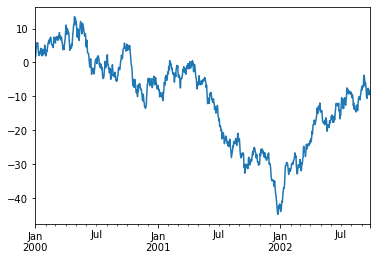

In [120]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

<Figure size 432x288 with 0 Axes>

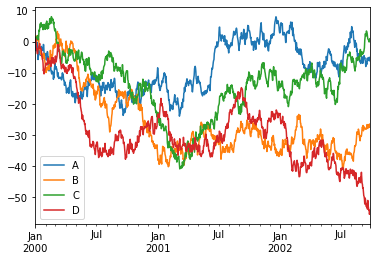

In [121]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df = df.cumsum()

plt.figure();

df.plot();

plt.legend(loc='best');